In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_train = np.array([1.0,2.0]) #the train set built with numpy
y_train = np.array([300.0,500.0])
print(f'x_train: {x_train} and x_train shape: {x_train.shape}')
print(f'y_train: {y_train} and y_train shape: {y_train.shape}')
m = x_train.shape[0] #m is the number of training examples
print(f'number of training examples: m = {m}')

x_train: [1. 2.] and x_train shape: (2,)
y_train: [300. 500.] and y_train shape: (2,)
number of training examples: m = 2


Model function
f(x) = w *x +b

In [10]:
w= 100 # pendiente
b = 100 #ordenada al origen

In [12]:
def compute_model_output(x,w,b):

    m = x.shape[0]

    f_wb = np.zeros(m) #gets an array with len of m (the shape of traning set)
                        #and holds the for loop
    for i in range(m):
        f_wb[i] = w *x[i] + b

    return f_wb

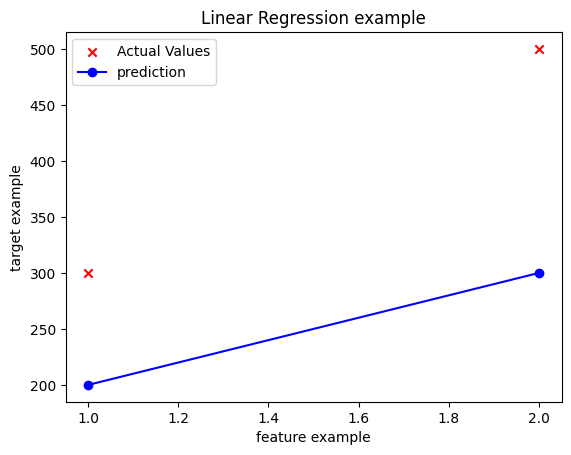

In [18]:
tmp_f_wb = compute_model_output(x_train,w,b) #function

#data points
plt.scatter(x_train,y_train, marker ='x', c='r',label='Actual Values')

#Model plot
plt.plot(x_train,tmp_f_wb,marker='o',c='b',label='prediction')

plt.title('Linear Regression example')
plt.ylabel('target example')
plt.xlabel('feature example')
plt.legend()
plt.show()




In [ ]:
def compute_cost(x,y,w,b):

    m = x.shape[0]

    cost_sum= 0

    for i in range(m):
        f_wb = w * x[i] +b
        cost = (f_wb - y[i])**2 #error
        cost_sum +=cost #suma total

    total_cost = (1/(2*m)) * cost_sum

    return total_cost